In [ ]:
# !tar -xvf  "data/aclImdb_v1.tar.gz"

^C


## Loading Data

In [1]:
import pandas as pd

In [ ]:
import os
import pandas as pd

# Hàm đọc dữ liệu từ các file và tạo DataFrame
def read_data_to_dataframe(data_dir):
    data = {'review': [], 'label': [], 'rating': []}

    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        # Bỏ qua thư mục 'unsup'
        if label == 'unsup' or not os.path.isdir(label_path):
            continue

        if os.path.isdir(label_path):
            file_paths = [
                os.path.join(label_path, file_name)
                for file_name in os.listdir(label_path)
                if os.path.isfile(os.path.join(label_path, file_name))
            ]
            # Đọc nhanh và hiệu quả tất cả các file
            reviews = [open(file_path, 'r', encoding='utf-8').read() for file_path in file_paths]

            # Lấy thông tin nhãn và rating từ tên file
            labels = [label] * len(file_paths)
            ratings = [file_name.split('_')[-1].split('.')[0] for file_name in os.listdir(label_path)]

            # Thêm vào dữ liệu
            data['review'].extend(reviews)
            data['label'].extend(labels)
            data['rating'].extend(ratings)

    # Tạo DataFrame từ dữ liệu
    df = pd.DataFrame(data)
    return df

# Đọc dữ liệu vào DataFrame
df_train = read_data_to_dataframe("aclImdb/train/")
df_test = read_data_to_dataframe("aclImdb/test/")

df = pd.concat([df_train, df_test], ignore_index=True)

df.to_csv('data/imdb_reviews.csv', index=False)

# Hiển thị và kiểm tra kết quả
print("Total reviews in DataFrame: ", df.shape[0])
df.head()


In [ ]:
df = pd.read_csv('data/imdb_reviews.csv', encoding='unicode_escape')
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (54469, 3)


,review,label,rating
0,"Film critics of the world, I apologize. It is ...",neg,1.0
1,"Audrey, I know you truly cherish your husband ...",neg,1.0
2,The only good thing about this unfunny dreck i...,neg,1.0
3,If you liked the Grinch movie... go watch that...,neg,1.0
4,This movie was physically painful to sit throu...,neg,2.0


In [ ]:
df_neutral = pd.read_csv("data/neutral_data.csv", )

df_neutral.drop(['Movie_ID'], axis=1, inplace=True)
df_neutral['rating'] = df_neutral['rating'].astype(int)
df_neutral['label'] = df_neutral['rating'].apply(lambda x: 1 if x >= 7 else (0 if x < 5 else 2))
df_neutral

,rating,review,label
0,5,I felt like the beginning started out decently...,2
1,5,Apart from the fact that the lead actor Michel...,2
2,6,Seems to be a trend making limited series that...,2
3,5,"I am always pulled in to anything that stars, ...",2
4,5,"I'm probably about three-quarters through, and...",2
...,...,...,...
1481,5,I had high expectations for this film given so...,2
1482,6,I had no idea what this film was about nor who...,2
1483,5,Hobbs and Shaw (Dwayne Johnson and Jason Stath...,2
1484,6,The movie was very good. I enjoyed it. But the...,2


In [ ]:
df =  pd.concat([df, df_neutral], ignore_index=True)
df.to_csv('data/imdb_reviews.csv', index=False)


In [ ]:
df = pd.read_csv('data/imdb_reviews.csv', encoding='unicode_escape')
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (54469, 3)


,review,label,rating
0,"Film critics of the world, I apologize. It is ...",neg,1.0
1,"Audrey, I know you truly cherish your husband ...",neg,1.0
2,The only good thing about this unfunny dreck i...,neg,1.0
3,If you liked the Grinch movie... go watch that...,neg,1.0
4,This movie was physically painful to sit throu...,neg,2.0


In [ ]:
df.head(), df.shape

(                                              review label  rating
 0  Film critics of the world, I apologize. It is ...   neg     1.0
 1  Audrey, I know you truly cherish your husband ...   neg     1.0
 2  The only good thing about this unfunny dreck i...   neg     1.0
 3  If you liked the Grinch movie... go watch that...   neg     1.0
 4  This movie was physically painful to sit throu...   neg     2.0,
 (54469, 3))

In [ ]:
df.dropna(axis=0, inplace=True)
df.tail()

,review,label,rating
51493,I had high expectations for this film given so...,2,5.0
51494,I had no idea what this film was about nor who...,2,6.0
51495,Hobbs and Shaw (Dwayne Johnson and Jason Stath...,2,5.0
51496,The movie was very good. I enjoyed it. But the...,2,6.0
51497,HOBBS & SHAW is the first spin-off from the FA...,2,6.0


In [ ]:
# pos = 1
# neg = 0
# neutral = 2
df['label'] = df['rating'].apply(lambda x: 1 if x >= 7 else (0 if x < 5 else 2))
df

,review,label,rating
0,"Film critics of the world, I apologize. It is ...",0,1.0
1,"Audrey, I know you truly cherish your husband ...",0,1.0
2,The only good thing about this unfunny dreck i...,0,1.0
3,If you liked the Grinch movie... go watch that...,0,1.0
4,This movie was physically painful to sit throu...,0,2.0
...,...,...,...
51493,I had high expectations for this film given so...,2,5.0
51494,I had no idea what this film was about nor who...,2,6.0
51495,Hobbs and Shaw (Dwayne Johnson and Jason Stath...,2,5.0
51496,The movie was very good. I enjoyed it. But the...,2,6.0


## EDA

In [ ]:
# No null values in dataset.
df['review'].isnull().sum()

0

In [ ]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])
print("Total Number of neutral reviews in data: ", df[df['label']==2].shape[0])

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000
Total Number of neutral reviews in data:  1498


In [ ]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    51498.000000
mean       227.165016
std        168.179512
min          1.000000
25%        125.000000
50%        171.000000
75%        276.000000
max       2470.000000
Name: review, dtype: float64

In [ ]:
df['word_counts'] = word_counts

## Data processing

In [2]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):

  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words

  # lowercase
  review = review.lower()

  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens

  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words

  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]

  # join words in preprocessed review
  review = ' '.join(review)

  return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,rating,word_counts,preprocessed_review
0,"Film critics of the world, I apologize. It is ...",0,1.0,402,film critic world apologize job give advice mo...
1,"Audrey, I know you truly cherish your husband ...",0,1.0,125,audrey know truly cherish husband ted memory p...
2,The only good thing about this unfunny dreck i...,0,1.0,141,good thing unfunny dreck pay saw free college ...
3,If you liked the Grinch movie... go watch that...,0,1.0,100,liked grinch movie go watch near good seussian...
4,This movie was physically painful to sit throu...,0,2.0,133,movie physically painful sit maybe like many p...


In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('data/imdb_reviews_preprocessing2_classification.csv', index=False)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp/data/imdb_reviews_preprocessing2_classification.csv')
df.head()

,review,label,rating,word_counts,preprocessed_review
0,"Film critics of the world, I apologize. It is ...",0,1.0,402,film critic world apologize job give advice mo...
1,"Audrey, I know you truly cherish your husband ...",0,1.0,125,audrey know truly cherish husband ted memory p...
2,The only good thing about this unfunny dreck i...,0,1.0,141,good thing unfunny dreck pay saw free college ...
3,If you liked the Grinch movie... go watch that...,0,1.0,100,liked grinch movie go watch near good seussian...
4,This movie was physically painful to sit throu...,0,2.0,133,movie physically painful sit maybe like many p...


Positive Reviews Wordcloud

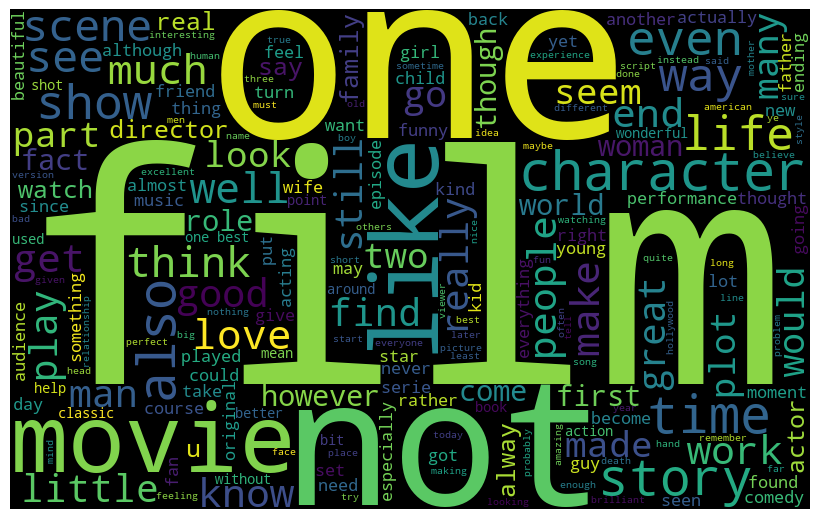

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Negative Reviews Wordcloud

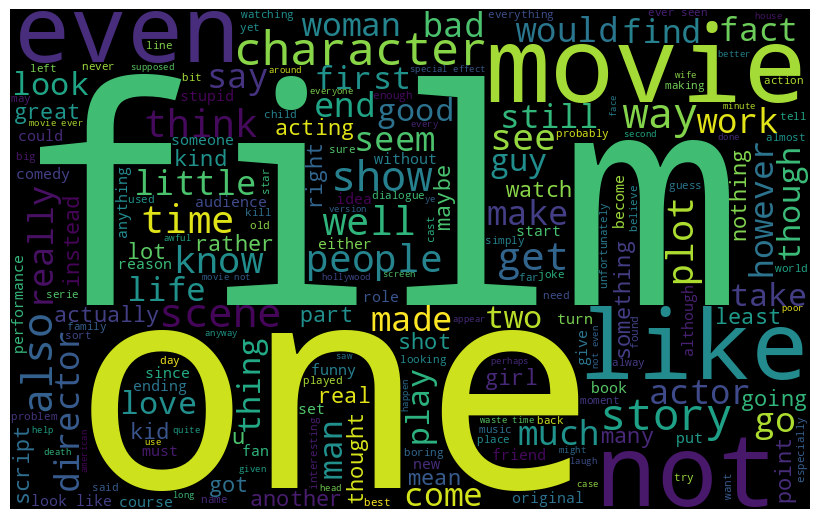

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Filter out NaN values and convert to strings
words_list = df[df['label'] == 0]['preprocessed_review'].dropna().astype(str).unique().tolist()

# Join the words into a single string
neg_words = " ".join(words_list)

# Generate and display the word cloud
neg_wordcloud = WordCloud(
    width=800, height=500,
    stopwords=stop_words
).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Neutral Reviews Wordcloud

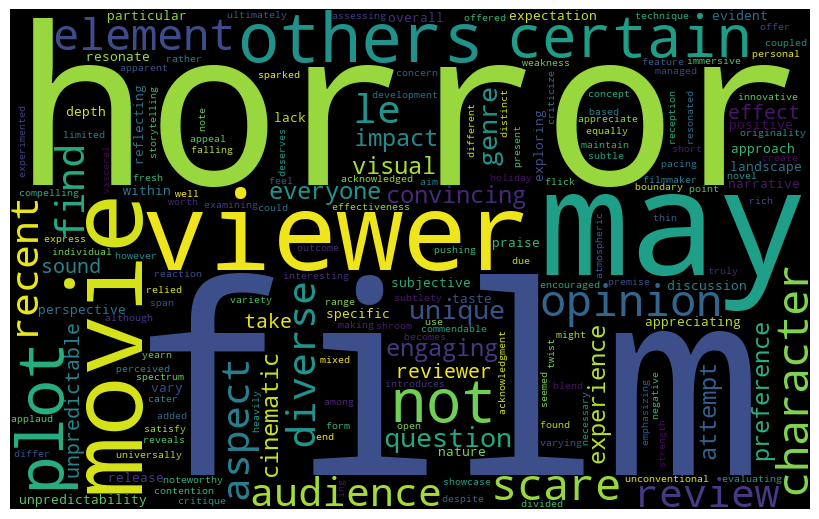

In [ ]:
words_list = df[df['label']==2]['preprocessed_review'].unique().tolist()
neutral_words = " ".join(words_list)

neutral_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(neutral_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neutral_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Splitting data(70-30): Train | Test

In [5]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data[:15000], y[:15000], test_size=0.3, stratify=y[:15000], random_state=331)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (10500, 4) (10500,)
Test data: (4500, 4) (4500,)


In [ ]:
print(df['review'][0])
print(df['preprocessed_review'][0])

Film critics of the world, I apologize. It is your job to give advice to the moviegoing public so that they can wisely choose what to spend money on. But I ignored your advice and I have been deeply hurt. However, my decision to see "The Cat in the Hat" wasn't made haphazardly. You see, three years ago all of you critics said that we should all avoid the "calamity" known as "How the Grinch Stole Christmas". Then some friends of mine took me to see it and it turned out to be a colorful, funny and almost hypnotic yuletide treat. So when the critics unleashed their fury against "The Cat in the Hat", another big budget Seuss update with a big name star in the title role, I thought that it must be the same old song. How wrong I was.<br /><br />For five whole minutes I thought I was in the clear. The opening credits are clever, the kids are charming and the production values are top notch. Then the cat showed up. There are many problems from this point on, but the biggest one was the woeful 

## Vectorizing Text Data

BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 100000  # Limit the vocabulary to the top n most frequent words in the entire dataset
min_df = 50  # Exclude terms that appear in fewer than n documents (single item in article_text column)
#  Transform each text into a vector of word counts
vectorizer_bow = CountVectorizer(stop_words="english",
                       preprocessor=data_preprocessing,
                       max_features = max_features,
                       min_df = min_df)

X_train_review_bow = vectorizer_bow.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vectorizer_bow.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn(


X_train_review_bow shape:  (10500, 2783)
X_test_review_bow shape:  (4500, 2783)


TFIDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features = 100000  # Limit the vocabulary to the top n most frequent words in the entire dataset
min_df = 50  # Exclude terms that appear in fewer than n documents (single item in article_text column)
vectorizer_tdidf = TfidfVectorizer(stop_words="english",
                       preprocessor=data_preprocessing,
                       max_features = max_features,
                       min_df = min_df)

X_train_review_tfidf = vectorizer_tdidf.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer_tdidf.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn(


X_train_review_tfidf shape:  (10500, 2783)
X_test_review_tfidf shape:  (4500, 2783)


## Building Models

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# --- Case 1: Bag-of-Words (BoW) ---

# Naive Bayes Classification for BoW
nb_model_bow = MultinomialNB(alpha=1)
nb_model_bow.fit(X_train_review_bow, y_train)

nb_preds_bow = nb_model_bow.predict(X_test_review_bow)
nb_accuracy_score_bow = accuracy_score(y_test, nb_preds_bow)
print(f'Naive Bayes Classification with BoW Accuracy: {nb_accuracy_score_bow}')
print(f'Naive Bayes Classification with BoW Report:\n{classification_report(y_test, nb_preds_bow)}')

# --- Case 2: TF-IDF ---
# Naive Bayes Classification for TF-IDF
nb_model_tfidf = MultinomialNB(alpha=1)
nb_model_tfidf.fit(X_train_review_tfidf, y_train)

nb_preds_tfidf = nb_model_tfidf.predict(X_test_review_tfidf)
nb_accuracy_score_tfidf = accuracy_score(y_test, nb_preds_tfidf)
print(f'Naive Bayes Classification with TF-IDF Accuracy: {nb_accuracy_score_tfidf}')
print(f'Naive Bayes Classification with TF-IDF Report:\n{classification_report(y_test, nb_preds_tfidf)}')



Naive Bayes Classification with BoW Accuracy: 0.8902222222222222
Naive Bayes Classification with BoW Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3750
           1       0.65      0.74      0.69       750

    accuracy                           0.89      4500
   macro avg       0.80      0.83      0.81      4500
weighted avg       0.90      0.89      0.89      4500

Naive Bayes Classification with TF-IDF Accuracy: 0.854
Naive Bayes Classification with TF-IDF Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3750
           1       0.98      0.13      0.22       750

    accuracy                           0.85      4500
   macro avg       0.92      0.56      0.57      4500
weighted avg       0.87      0.85      0.80      4500



In [ ]:
# --- Perform Grid Search for Hyperparameter Tuning ---
# Define the parameter grid for grid search
# Grid Search for BoW
param_grid_nb_bow = {
        'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'fit_prior': [True, False],  # Include fit_prior parameter
    'class_prior': [None, [0.3, 0.4, 0.3]]  # Include class_prior parameter
}

grid_search_nb_bow = GridSearchCV(nb_model_bow, param_grid_nb_bow, cv=5, scoring='accuracy')
grid_search_nb_bow.fit(X_train_review_bow, y_train)

# Get the best parameters and model for BoW
best_params_nb_bow = grid_search_nb_bow.best_params_
best_model_nb_bow = grid_search_nb_bow.best_estimator_

# Print best parameters
print("Best Parameters for Naive Bayes with BoW:", best_params_nb_bow)

# Predict using the best model for BoW
nb_preds_grid_bow = best_model_nb_bow.predict(X_test_review_bow)
nb_accuracy_score_grid_bow_opt = accuracy_score(y_test, nb_preds_grid_bow)
print(f'Naive Bayes with BoW Accuracy (GridSearchCV): {nb_accuracy_score_grid_bow_opt}')
print(f'Naive Bayes with BoW Report (GridSearchCV):\n{classification_report(y_test, nb_preds_grid_bow)}')

# SVM Classification with GridSearchCV for TF-IDF
# Grid Search for TF-IDF
param_grid_nb_tfidf = {
        'alpha': [0.1, 0.5, 1, 2, 5, 10],
    'fit_prior': [True, False],  # Include fit_prior parameter
    'class_prior': [None, [0.3, 0.4, 0.3]]  # Include class_prior parameter
}
grid_search_nb_tfidf = GridSearchCV(nb_model_tfidf, param_grid_nb_tfidf, cv=5, scoring='accuracy')
grid_search_nb_tfidf.fit(X_train_review_tfidf, y_train)

# Get the best parameters and model for TF-IDF
best_params_nb_tfidf = grid_search_nb_tfidf.best_params_
best_model_nb_tfidf = grid_search_nb_tfidf.best_estimator_

# Print best parameters
print("Best Parameters for Naive Bayes with TF-IDF:", best_params_nb_tfidf)

# Predict using the best model for TF-IDF
nb_preds_grid_tfidf = best_model_nb_tfidf.predict(X_test_review_tfidf)
nb_accuracy_score_grid_tfidf_opt = accuracy_score(y_test, nb_preds_grid_tfidf)
print(f'Naive Bayes with TF-IDF Accuracy (GridSearchCV): {nb_accuracy_score_grid_tfidf_opt}')
print(f'Naive Bayes with TF-IDF Report (GridSearchCV):\n{classification_report(y_test, nb_preds_grid_tfidf)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 779, in fit
    self._update_class_log_prior(class_prior=class_prior)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 595, in _update_class_log_prior
    raise ValueError("Number of priors must match number 

Best Parameters for Naive Bayes with BoW: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
Naive Bayes with BoW Accuracy (GridSearchCV): 0.8933333333333333
Naive Bayes with BoW Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3750
           1       0.66      0.74      0.70       750

    accuracy                           0.89      4500
   macro avg       0.80      0.83      0.82      4500
weighted avg       0.90      0.89      0.90      4500

Best Parameters for Naive Bayes with TF-IDF: {'alpha': 0.1, 'class_prior': None, 'fit_prior': False}
Naive Bayes with TF-IDF Accuracy (GridSearchCV): 0.8704444444444445
Naive Bayes with TF-IDF Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3750
           1       0.58      0.83      0.68       750

    accuracy                           0.87      4500
   macro avg       0.77      0.86

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 779, in fit
    self._update_class_log_prior(class_prior=class_prior)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 595, in _update_class_log_prior
    raise ValueError("Number of priors must match number 

SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- Linear SVC with TF-IDF ---
svc_tfidf_model = SVC(kernel='linear', decision_function_shape='ovr')
svc_tfidf_model.fit(X_train_review_tfidf, y_train)
svc_tfidf_preds = svc_tfidf_model.predict(X_test_review_tfidf)
svc_tfidf_accuracy = accuracy_score(y_test, svc_tfidf_preds)

print(f'Linear SVC with TF-IDF Accuracy: {svc_tfidf_accuracy}')
print(f'Linear SVC with TF-IDF Classification Report:\n{classification_report(y_test, svc_tfidf_preds)}')

# --- Linear SVC with BOW ---
svc_bow_model = SVC(kernel='linear', decision_function_shape='ovr')
svc_bow_model.fit(X_train_review_bow, y_train)
svc_bow_preds = svc_bow_model.predict(X_test_review_bow)
svc_bow_accuracy = accuracy_score(y_test, svc_bow_preds)

print(f'Linear SVC with BOW Accuracy: {svc_bow_accuracy}')
print(f'Linear SVC with BOW Classification Report:\n{classification_report(y_test, svc_bow_preds)}')


Linear SVC with TF-IDF Accuracy: 0.9088888888888889
Linear SVC with TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3750
           1       0.81      0.59      0.68       750

    accuracy                           0.91      4500
   macro avg       0.87      0.78      0.82      4500
weighted avg       0.90      0.91      0.90      4500

Linear SVC with BOW Accuracy: 0.874
Linear SVC with BOW Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3750
           1       0.61      0.67      0.64       750

    accuracy                           0.87      4500
   macro avg       0.77      0.79      0.78      4500
weighted avg       0.88      0.87      0.88      4500



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for grid search
param_grid_svc_tfidf = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'decision_function_shape': ['ovr']  # Decision function shape
}

# Create the SVM model with one-vs-rest decision function shape
svc_tfidf_model = SVC()

# Grid Search for TF-IDF
grid_search_svc_tfidf = GridSearchCV(svc_tfidf_model, param_grid_svc_tfidf, cv=5, scoring='accuracy')
grid_search_svc_tfidf.fit(X_train_review_tfidf, y_train)


# Get the best parameters and model for TF-IDF
best_params_svc_tfidf = grid_search_svc_tfidf.best_params_
best_model_svc_tfidf = grid_search_svc_tfidf.best_estimator_

# Print best parameters for TF-IDF
for param, value in best_params_svc_tfidf.items():
    print(f"Best {param} for Linear SVC with TF-IDF: {value}")

# Predict using the best model for TF-IDF
svc_tfidf_preds = best_model_svc_tfidf.predict(X_test_review_tfidf)
svc_tfidf_accuracy_opt = accuracy_score(y_test, svc_tfidf_preds)

print(f'Linear SVC with TF-IDF Accuracy (GridSearchCV): {svc_tfidf_accuracy_opt}')
print(f'Linear SVC with TF-IDF Classification Report (GridSearchCV):\n{classification_report(y_test, svc_tfidf_preds)}')




Best C for Linear SVC with TF-IDF: 10
Best decision_function_shape for Linear SVC with TF-IDF: ovr
Best gamma for Linear SVC with TF-IDF: scale
Best kernel for Linear SVC with TF-IDF: rbf
Linear SVC with TF-IDF Accuracy (GridSearchCV): 0.9144444444444444
Linear SVC with TF-IDF Classification Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3750
           1       0.86      0.58      0.69       750

    accuracy                           0.91      4500
   macro avg       0.89      0.78      0.82      4500
weighted avg       0.91      0.91      0.91      4500



In [ ]:
# Define the parameter grid for grid search
param_grid_svc_bow = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'decision_function_shape': ['ovr']  # Decision function shape
}

# Create the SVM model with one-vs-rest decision function shape
svc_bow_model = SVC()

# Grid Search for BoW
grid_search_svc_bow = GridSearchCV(svc_bow_model, param_grid_svc_bow, cv=5, scoring='accuracy')
grid_search_svc_bow.fit(X_train_review_bow, y_train)

# Get the best parameters and model for BoW
best_params_svc_bow = grid_search_svc_bow.best_params_
best_model_svc_bow = grid_search_svc_bow.best_estimator_

# Print best parameters for BoW
for param, value in best_params_svc_bow.items():
    print(f"Best {param} for Linear SVC with BoW: {value}")

# Predict using the best model for BoW
svc_bow_preds = best_model_svc_bow.predict(X_test_review_bow)
svc_bow_accuracy_opt = accuracy_score(y_test, svc_bow_preds)

print(f'Linear SVC with BOW Accuracy (GridSearchCV): {svc_bow_accuracy_opt}')
print(f'Linear SVC with BOW Classification Report (GridSearchCV):\n{classification_report(y_test, svc_bow_preds)}')

Best C for Linear SVC with BoW: 100
Best decision_function_shape for Linear SVC with BoW: ovr
Best gamma for Linear SVC with BoW: auto
Best kernel for Linear SVC with BoW: rbf
Linear SVC with BOW Accuracy (GridSearchCV): 0.9031111111111111
Linear SVC with BOW Classification Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3750
           1       0.74      0.65      0.69       750

    accuracy                           0.90      4500
   macro avg       0.83      0.80      0.82      4500
weighted avg       0.90      0.90      0.90      4500



Compare

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', nb_accuracy_score_bow])
x.add_row(['BOW', 'Naive Bayes OPT', nb_accuracy_score_grid_bow_opt])
x.add_row(['TFIDF', 'Naive Bayes', nb_accuracy_score_tfidf])
x.add_row(['TFIDF', 'Naive Bayes OPT', nb_accuracy_score_grid_tfidf_opt])
x.add_row(['BOW', 'SVC', svc_bow_accuracy])
x.add_row(['BOW', 'SVC OPT', svc_bow_accuracy_opt])
x.add_row(['TFIDF', 'SVC', svc_tfidf_accuracy])
x.add_row(['TFIDF', 'SVC OPT', svc_tfidf_accuracy_opt])
print(x)

+------------+-----------------+--------------------+
| Vectorizer |      Model      |      Accuracy      |
+------------+-----------------+--------------------+
|    BOW     |   Naive Bayes   | 0.8902222222222222 |
|    BOW     | Naive Bayes OPT | 0.8933333333333333 |
|   TFIDF    |   Naive Bayes   |       0.854        |
|   TFIDF    | Naive Bayes OPT | 0.8704444444444445 |
|    BOW     |       SVC       |       0.874        |
|    BOW     |     SVC OPT     | 0.9031111111111111 |
|   TFIDF    |       SVC       | 0.9088888888888889 |
|   TFIDF    |     SVC OPT     | 0.9144444444444444 |
+------------+-----------------+--------------------+


# Test Model

In [10]:
import tkinter as tk
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Train the SVC model
clf = make_pipeline(SVC(C=10, kernel='rbf', gamma='scale' , decision_function_shape='ovr'))
clf.fit(X_train_review_tfidf, y_train)

Pipeline(steps=[('svc', SVC(C=10))])

In [15]:
# Function to process input and display output
def process_input(input_text):
    text_preprocessed = data_preprocessing(input_text)

    # Preprocess the input text
    input = vectorizer_tdidf.transform([text_preprocessed])

    # Make predictions using the trained classifier
    prediction = clf.predict(input)

    # Transfer output
    if prediction == 0:
        output = 'Negative'
    elif prediction == 1:
        output = 'Positive'
    else:
        output = 'Neutral'

    return output

In [35]:
user_input = """The film captivated audiences with its compelling storyline,
  stellar performances, and breathtaking cinematography, leaving everyone in awe."""
# Process input and display output
output_result = process_input(user_input)
print(f"Output: {output_result}")

Output: Positive


In [34]:
user_input = "The movie's plot was convoluted, the acting felt forced, and the overall viewing experience was disappointing."
output_result = process_input(user_input)
print(f"Output: {output_result}")

Output: Negative


In [40]:
user_input = """	The cinematic landscape is rich with opinions on the
  movie under discussion. While some viewers applaud its attempt
  at a novel horror narrative, others find certain aspects falling short of their expectations."""
output_result = process_input(user_input)
print(f"Output: {output_result}")

Output: Negative
